### Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix,classification_report

### Reading and Analyzing the Dataset

In [3]:
data = pd.read_csv('ionosphere.csv')

In [4]:
data.head(3)

,RRD1,RRD2,RRD3,RRD4,RRD5,RRD6,RRD7,RRD8,RRD9,RRD10,...,RRD26,RRD27,RRD28,RRD29,RRD30,RRD31,RRD32,RRD33,RRD34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RRD1    351 non-null    int64  
 1   RRD2    351 non-null    int64  
 2   RRD3    351 non-null    float64
 3   RRD4    351 non-null    float64
 4   RRD5    351 non-null    float64
 5   RRD6    351 non-null    float64
 6   RRD7    351 non-null    float64
 7   RRD8    351 non-null    float64
 8   RRD9    351 non-null    float64
 9   RRD10   351 non-null    float64
 10  RRD11   351 non-null    float64
 11  RRD12   351 non-null    float64
 12  RRD13   351 non-null    float64
 13  RRD14   351 non-null    float64
 14  RRD15   351 non-null    float64
 15  RRD16   351 non-null    float64
 16  RRD17   351 non-null    float64
 17  RRD18   351 non-null    float64
 18  RRD19   351 non-null    float64
 19  RRD20   351 non-null    float64
 20  RRD21   351 non-null    float64
 21  RRD22   351 non-null    float64
 22  RR

#### We have 351 entries of 34 integer attributes (RRD1 - RRD34) which then in turn give us the result in the Class Column

In [6]:
good = pd.get_dummies(data['Class'],drop_first=True)

In [7]:
data.drop('Class',axis = 1,inplace=True)

In [8]:
data['good'] = good

In [9]:
data.head(3)

,RRD1,RRD2,RRD3,RRD4,RRD5,RRD6,RRD7,RRD8,RRD9,RRD10,...,RRD26,RRD27,RRD28,RRD29,RRD30,RRD31,RRD32,RRD33,RRD34,good
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,True
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,False
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,True


#### Converted Class from g/b to True/False (1/0)

<Axes: xlabel='good', ylabel='count'>

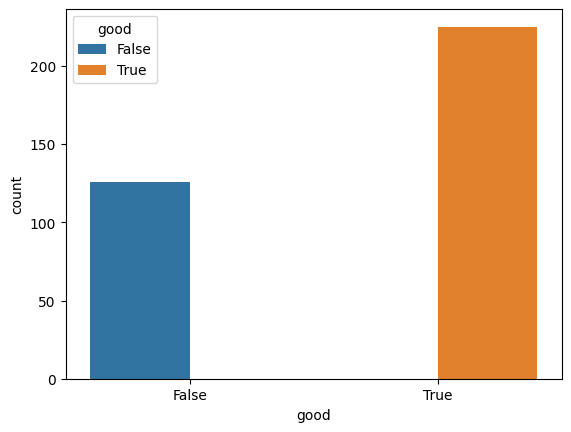

In [14]:
sns.countplot(data=data,x='good',hue='good')

## Splitting Data into Training and Testing Sets

In [17]:
X = data.drop('good',axis=1)
y = data['good']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lreg = LogisticRegression()

In [30]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [31]:
predictions = lreg.predict(X_test)

In [33]:
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test,predictions))

[[32  7]
 [ 1 66]]

              precision    recall  f1-score   support

       False       0.97      0.82      0.89        39
        True       0.90      0.99      0.94        67

    accuracy                           0.92       106
   macro avg       0.94      0.90      0.92       106
weighted avg       0.93      0.92      0.92       106



## SVM

In [40]:
from sklearn.svm import SVC

In [41]:
svm = SVC()

In [42]:
svm.fit(X_train,y_train)

SVC()

In [43]:
predictions = svm.predict(X_test)

In [44]:
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test,predictions))

[[34  5]
 [ 0 67]]

              precision    recall  f1-score   support

       False       1.00      0.87      0.93        39
        True       0.93      1.00      0.96        67

    accuracy                           0.95       106
   macro avg       0.97      0.94      0.95       106
weighted avg       0.96      0.95      0.95       106



In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [47]:
grid = GridSearchCV(estimator=SVC(),param_grid=param_grid,verbose=3)

In [48]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.653 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.653 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.653 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.796 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.776 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.796 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.735 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.673 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.653 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [49]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [50]:
grid_predictions = grid.predict(X_test)

In [51]:
print(confusion_matrix(y_test,grid_predictions))
print()
print(classification_report(y_test,grid_predictions))

[[38  1]
 [ 0 67]]

              precision    recall  f1-score   support

       False       1.00      0.97      0.99        39
        True       0.99      1.00      0.99        67

    accuracy                           0.99       106
   macro avg       0.99      0.99      0.99       106
weighted avg       0.99      0.99      0.99       106



## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dtree = DecisionTreeClassifier()

In [54]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
predictions = dtree.predict(X_test)

In [56]:
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test,predictions))

[[33  6]
 [ 5 62]]

              precision    recall  f1-score   support

       False       0.87      0.85      0.86        39
        True       0.91      0.93      0.92        67

    accuracy                           0.90       106
   macro avg       0.89      0.89      0.89       106
weighted avg       0.90      0.90      0.90       106



## Random Forests

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc = RandomForestClassifier()

In [59]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
predictions = rfc.predict(X_test)

In [61]:
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test,predictions))

[[36  3]
 [ 1 66]]

              precision    recall  f1-score   support

       False       0.97      0.92      0.95        39
        True       0.96      0.99      0.97        67

    accuracy                           0.96       106
   macro avg       0.96      0.95      0.96       106
weighted avg       0.96      0.96      0.96       106



## XGBoost

In [62]:
from xgboost import XGBClassifier

In [63]:
xgb = XGBClassifier()

In [64]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [65]:
predictions = xgb.predict(X_test)

In [66]:
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test,predictions))

[[34  5]
 [ 2 65]]

              precision    recall  f1-score   support

       False       0.94      0.87      0.91        39
        True       0.93      0.97      0.95        67

    accuracy                           0.93       106
   macro avg       0.94      0.92      0.93       106
weighted avg       0.93      0.93      0.93       106

